### **Load Dataset** ###

#### **Import Python Libraries ad Modules** ####

In [1]:
# Import pandas and numpy Libraries
import pandas as pd
import numpy as np

# Import pandas and matplotlib modules for Data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Import scikit-learn module for module building
from sklearn.tree import DecisionTreeRegressor

# Import scikit-Learn module for train and test data
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [6]:
# Specify the full path of the csv file 
filename = 'C:/Users/jayanth/Desktop/MS UNT/INSD 5170 - BigData/Data/housing_boston.csv'

# specify the field names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Load the data in to the data frame
df = pd.read_csv(filename, names=names)

# creating a subset from the data frame
df2 = df[['RM', 'AGE', 'DIS','RAD','PTRATIO','MEDV']]


### **Clean Dataset** ###

#### ** The following values cannot be 0. Find and Mark as missing value** ####

In [8]:
# Find all the 0 and mark as missing value

df[['RM','PTRATIO','MEDV']] = df[['RM','PTRATIO','MEDV']].replace(0,np.NaN)

# Count the no. of missing value
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### **Exploratory Data Analysis** ###

#### **Find the shape and dimension of the Dataset** ####

In [9]:
# Find the number of recored in the Dataset

print(df2.shape)

(452, 6)


**This shows the file has 452 rows and 6 columns**

### **Find the attributes/Variable** ###


In [11]:
#Find the data type of all the column
print(df2.dtypes)

RM         float64
AGE        float64
DIS        float64
RAD          int64
PTRATIO    float64
MEDV       float64
dtype: object


**The above result shows that all are integer**

### **Peek at the Data set** ###

In [12]:
#Look at the top 5 dataset
print(df2.head(5))

      RM   AGE     DIS  RAD  PTRATIO  MEDV
0  6.575  65.2  4.0900    1     15.3  24.0
1  6.421  78.9  4.9671    2     17.8  21.6
2  7.185  61.1  4.9671    2     17.8  34.7
3  6.998  45.8  6.0622    3     18.7  33.4
4  7.147  54.2  6.0622    3     18.7  36.2


### **Statisctical Summary** ###


In [14]:
#Get the Statisctical summary for the dataset
print(df2.describe())


               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000   20.200000   26.600000
max      8.780000  100.000000   12.126500   24.000000   22.000000   50.000000


**This result shows Mean, Standard deviation and interquatile range**
### **Univariate Data Visualization** ###


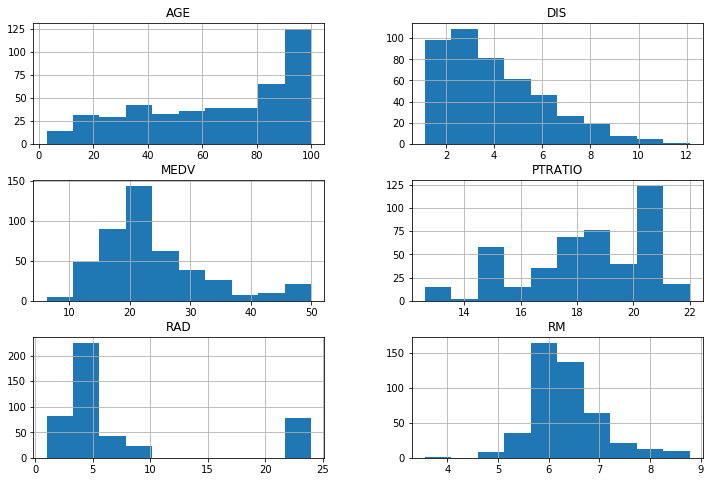

In [17]:
#Plot the histogram

df2.hist(figsize=(12,8))
pyplot.show()


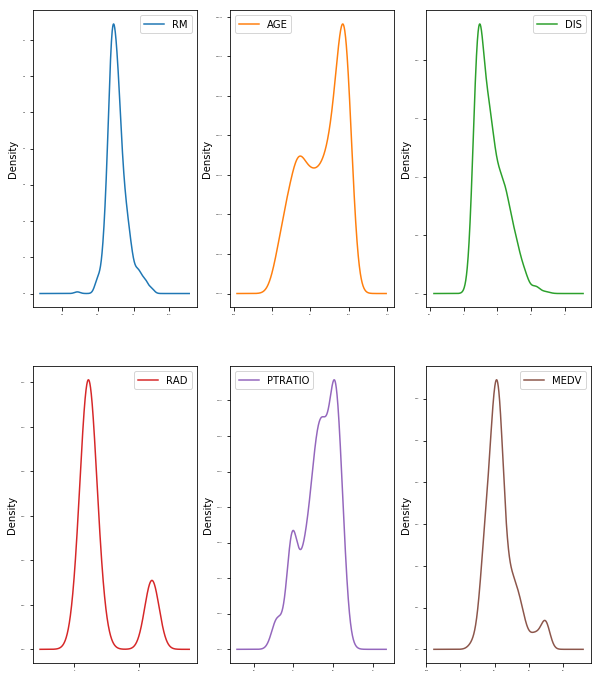

In [24]:
#Density plot

df2.plot(kind = 'density', subplots = True, layout=(2,3), sharex=False, legend = True, fontsize=2, figsize=(10,12))
pyplot.show()


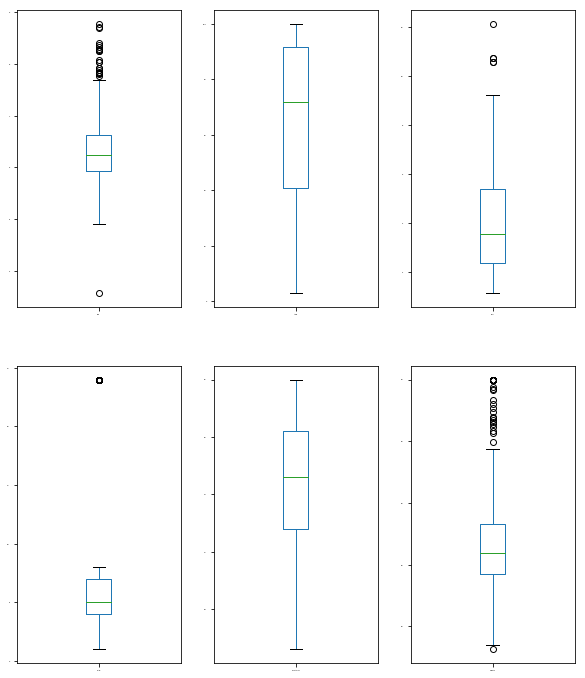

In [22]:
#Box plot

df2.plot(kind = 'box', subplots = True, layout=(2,3), sharex=False, sharey = False, fontsize=2, figsize=(10,12))
pyplot.show()


### **Multivariate Data Visuzalization** ###
#### **Scatter Matrix Plot** ####

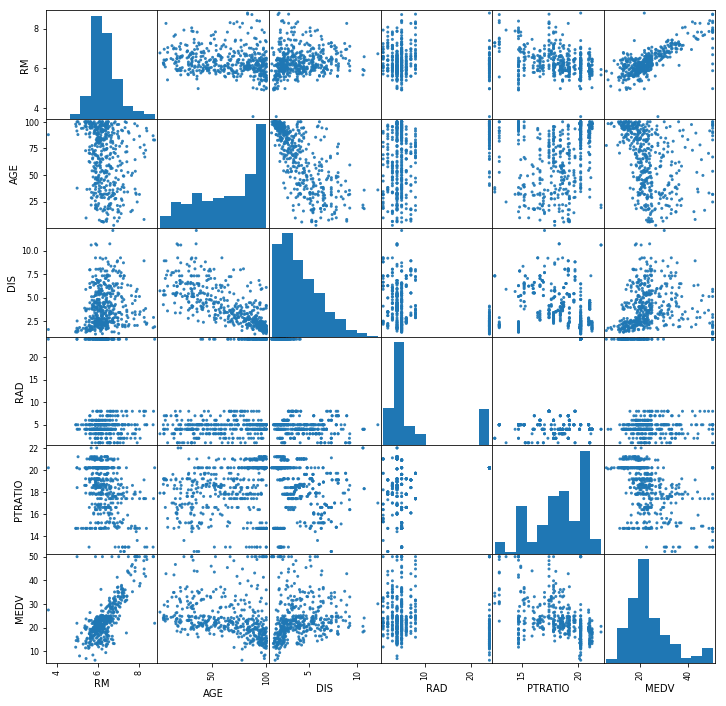

In [29]:
#Scatter Matrix
scatter_matrix(df2,alpha = 0.9, figsize=(12,12))
pyplot.show()


### **Split Input/Output arrary** ###


In [30]:
#Store the Dataframe into Array
array=df2.values

#Assign all rows and 1 - 4 columns
X = array[:,0:5]

#Assign all rows and last column
Y = array[:,5]



### **Split the input/output arrary into training/testing set**###

In [31]:
#Split the 67% of dataset into training data and 33% into testing
test_size = .33

#Select seed for randomization
seed =7

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = test_size,random_state = seed)


### **Build and train the model** ###

In [33]:
# Build the Decision tree model
model = DecisionTreeRegressor()

#Train the model using training dataset
model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### **Calculate the R Squared value** ###

In [39]:
R_squared = model.score(X_test, Y_test)

print(R_squared)



0.45507309422687275


**Predict the "Median value of owner-occupied homes in 1000 dollars" for these two new records:**
<br>
**a. Record 1**
<br>
 RM: average number of rooms per dwelling = 4
<br>
 AGE: proportion of owner-occupied units built prior to 1940 = 45
<br>
 DIS: weighted distances to five Boston employment centers = 5.7
<br>
 RAD: index of accessibility to radial highways = 2.5
<br>
 PTRATIO: pupil-teacher ratio by town = 15

In [41]:
model.predict([[4,45,5.7,2.5,15]])


array([19.3])

**The model predicts the value of home is 19,000 in the given suburb**


**b. Record 2**
<br>
 RM: average number of rooms per dwelling = 5
<br>
 AGE: proportion of owner-occupied units built prior to 1940 = 30
<br>
 DIS: weighted distances to five Boston employment centers = 7
<br>
 RAD: index of accessibility to radial highways = 4
<br>
 PTRATIO: pupil-teacher ratio by town = 12


In [42]:
model.predict([[5,30,7,4,12]])


array([20.9])

**The model predicts the value of home is 20,000 in the given subrub**

###  **Evaluate the modle using K-Fold Cross validation** ###

In [43]:
# Spefify the K-Size

num_fold = 10

#Fix the random seed. It is same as we used in the subset
#For each time the process is repeated
seed = 7

k_fold = KFold(n_splits=num_fold, random_state = seed)

# For Linear regression Model we Mean SQuare Value for Scoring
scoring = 'neg_mean_squared_error'

# Score the model with K-fold cross validation
result=cross_val_score(model, X, Y, cv=k_fold, scoring=scoring)

#Print the mean of the result
print(result.mean())




-40.21406666666667


**This result shows the mean of all the errors. In normal case it is a positive number. Scikit learn reports this as negative**